# Natural hazards and underwater communication network

Contrary to common belief, almost all data traffic (99%) is transported by submarine cables, not satellites. Indeed, cables can carry much more data than satellites and at a much lower cost. These cables, laid on the ocean floor, are exposed to various risks that can lead to their breakage. Some regions of the world may then find themselves without an Internet network.The following questions should therefore be asked:*what is the greatest risk to cables? is the cable routing optimal to reduce their exposure to risks?*

## Step 1: the cable dataset 

First, I import pandas and geopandas to use the power of pandas to geospatial data.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Then I paste the url from the github page to download my first cable dataset.

In [2]:
fname = "https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/public/api/v2/cable/cable-geo.json"
df = gpd.read_file(fname, geometry='geometry')
print(type(df))
df.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


color                             slug  \
0  4d50a2  acs-alaska-oregon-network-akorn   
1  09addc                    aden-djibouti   
2  66b646                          adria-1   
3  933d97                      aeconnect-1   
4  b6b8ba       africa-coast-to-europe-ace   

                                            geometry  
0  (LINESTRING (-151.291670394858 60.689928950949...  
1  (LINESTRING (43.1479928876509 11.5948813293645...  
2  (LINESTRING (19.9195913741185 39.6195333476856...  
3  (LINESTRING (-9.23214578701738 54.207114982820...  
4  (LINESTRING (10.3500669032594 -10.620064860363...

I'll need to know the coordinate reference system that my data is projected in.

In [3]:
df.crs

{'init': 'epsg:4326'}

I want to rename the "slug" column as "id" and I want "id" to be df index.

In [4]:
df = df.rename(columns={'slug':'id'})
df = df.set_index('id')
df.head()

color  \
id                                        
acs-alaska-oregon-network-akorn  4d50a2   
aden-djibouti                    09addc   
adria-1                          66b646   
aeconnect-1                      933d97   
africa-coast-to-europe-ace       b6b8ba   

                                                                          geometry  
id                                                                                  
acs-alaska-oregon-network-akorn  (LINESTRING (-151.291670394858 60.689928950949...  
aden-djibouti                    (LINESTRING (43.1479928876509 11.5948813293645...  
adria-1                          (LINESTRING (19.9195913741185 39.6195333476856...  
aeconnect-1                      (LINESTRING (-9.23214578701738 54.207114982820...  
africa-coast-to-europe-ace       (LINESTRING (10.3500669032594 -10.620064860363...

Now, I want to download my second cable dataset and give the same index as the previous one. 

In [5]:
data = gpd.GeoDataFrame()

for x in df.index:
    url = 'https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/public/api/v2/cable/'+x+'.json'
    DF = gpd.GeoDataFrame(pd.read_json(url))
    data = pd.concat([data, DF])

In [6]:
data.head()

id                               name  \
0  acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)   
1  acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)   
2  acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)   
3  acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)   
0                    aden-djibouti                      Aden-Djibouti   

   cable_id                                     landing_points    length  \
0      1571  {'landing_point_id': 4067, 'id': 'anchorage-ak...  3,000 km   
1      1571  {'landing_point_id': 8539, 'id': 'florence-or-...  3,000 km   
2      1571  {'landing_point_id': 8392, 'id': 'homer-ak-uni...  3,000 km   
3      1571  {'landing_point_id': 8540, 'id': 'nikiski-ak-u...  3,000 km   
0      1307  {'landing_point_id': 5969, 'id': 'aden-yemen',...    269 km   

          rfs                                             owners  \
0  2009 April                              Alaska Communications   
1  2009 April                              Alaska Communications   
2  2009 April                              Alaska Communications   
3  2009 April                              Alaska Communications   
0        1994  Djibouti Telecom,  TeleYemen,  Tata Communicat...   

                                    url notes  
0  https://www.alaskacommunications.com   NaN  
1  https://www.alaskacommunications.com   NaN  
2  https://www.alaskacommunications.com   NaN  
3  https://www.alaskacommunications.com   NaN  
0           http://www.teleyemen.com.ye   NaN

In [7]:
data = data.set_index('id')
data.head()

name  cable_id  \
id                                                                             
acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)      1571   
acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)      1571   
acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)      1571   
acs-alaska-oregon-network-akorn  ACS Alaska-Oregon Network (AKORN)      1571   
aden-djibouti                                        Aden-Djibouti      1307   

                                                                    landing_points  \
id                                                                                   
acs-alaska-oregon-network-akorn  {'landing_point_id': 4067, 'id': 'anchorage-ak...   
acs-alaska-oregon-network-akorn  {'landing_point_id': 8539, 'id': 'florence-or-...   
acs-alaska-oregon-network-akorn  {'landing_point_id': 8392, 'id': 'homer-ak-uni...   
acs-alaska-oregon-network-akorn  {'landing_point_id': 8540, 'id': 'nikiski-ak-u...   
aden-djibouti                    {'landing_point_id': 5969, 'id': 'aden-yemen',...   

                                   length         rfs  \
id                                                      
acs-alaska-oregon-network-akorn  3,000 km  2009 April   
acs-alaska-oregon-network-akorn  3,000 km  2009 April   
acs-alaska-oregon-network-akorn  3,000 km  2009 April   
acs-alaska-oregon-network-akorn  3,000 km  2009 April   
aden-djibouti                      269 km        1994   

                                                                            owners  \
id                                                                                   
acs-alaska-oregon-network-akorn                              Alaska Communications   
acs-alaska-oregon-network-akorn                              Alaska Communications   
acs-alaska-oregon-network-akorn                              Alaska Communications   
acs-alaska-oregon-network-akorn                              Alaska Communications   
aden-djibouti                    Djibouti Telecom,  TeleYemen,  Tata Communicat...   

                                                                  url notes  
id                                                                           
acs-alaska-oregon-network-akorn  https://www.alaskacommunications.com   NaN  
acs-alaska-oregon-network-akorn  https://www.alaskacommunications.com   NaN  
acs-alaska-oregon-network-akorn  https://www.alaskacommunications.com   NaN  
acs-alaska-oregon-network-akorn  https://www.alaskacommunications.com   NaN  
aden-djibouti                             http://www.teleyemen.com.ye   NaN

Now I can join my two datasets using their common index.

In [8]:
final_df = data.join(df)

Then, I re-index the resulting dataset and I delete the unnecessary columns.

In [9]:
final_df = final_df.set_index('cable_id')
final_df = final_df.drop(columns=['url', 'notes', 'color', 'landing_points'])
final_df.head()

name    length         rfs  \
cable_id                                                            
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km  2009 April   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km  2009 April   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km  2009 April   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km  2009 April   
1307                          Aden-Djibouti    269 km        1994   

                                                     owners  \
cable_id                                                      
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1307      Djibouti Telecom,  TeleYemen,  Tata Communicat...   

                                                   geometry  
cable_id                                                     
1571      (LINESTRING (-151.291670394858 60.689928950949...  
1571      (LINESTRING (-151.291670394858 60.689928950949...  
1571      (LINESTRING (-151.291670394858 60.689928950949...  
1571      (LINESTRING (-151.291670394858 60.689928950949...  
1307      (LINESTRING (43.1479928876509 11.5948813293645...

Then, I delete the month of the rfs column. 

In [10]:
final_df['RFS'] = final_df['rfs'].str.split(' ').str.get(0)
final_df = final_df.drop(columns=['rfs'])
final_df.head()

name    length  \
cable_id                                                
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1307                          Aden-Djibouti    269 km   

                                                     owners  \
cable_id                                                      
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1307      Djibouti Telecom,  TeleYemen,  Tata Communicat...   

                                                   geometry   RFS  
cable_id                                                           
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009  
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009  
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009  
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009  
1307      (LINESTRING (43.1479928876509 11.5948813293645...   NaN

Now, I want to convert the RFS from string to datetime.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

final_df.RFS = pd.to_numeric(final_df.RFS, downcast='signed', errors='coerce')

final_df.RFS =  pd.to_datetime(final_df.RFS, format='%Y')

In [12]:
final_df['RFS'] = final_df['RFS'].dt.year
final_df.head()

name    length  \
cable_id                                                
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1307                          Aden-Djibouti    269 km   

                                                     owners  \
cable_id                                                      
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1307      Djibouti Telecom,  TeleYemen,  Tata Communicat...   

                                                   geometry     RFS  
cable_id                                                             
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0  
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0  
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0  
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0  
1307      (LINESTRING (43.1479928876509 11.5948813293645...     NaN

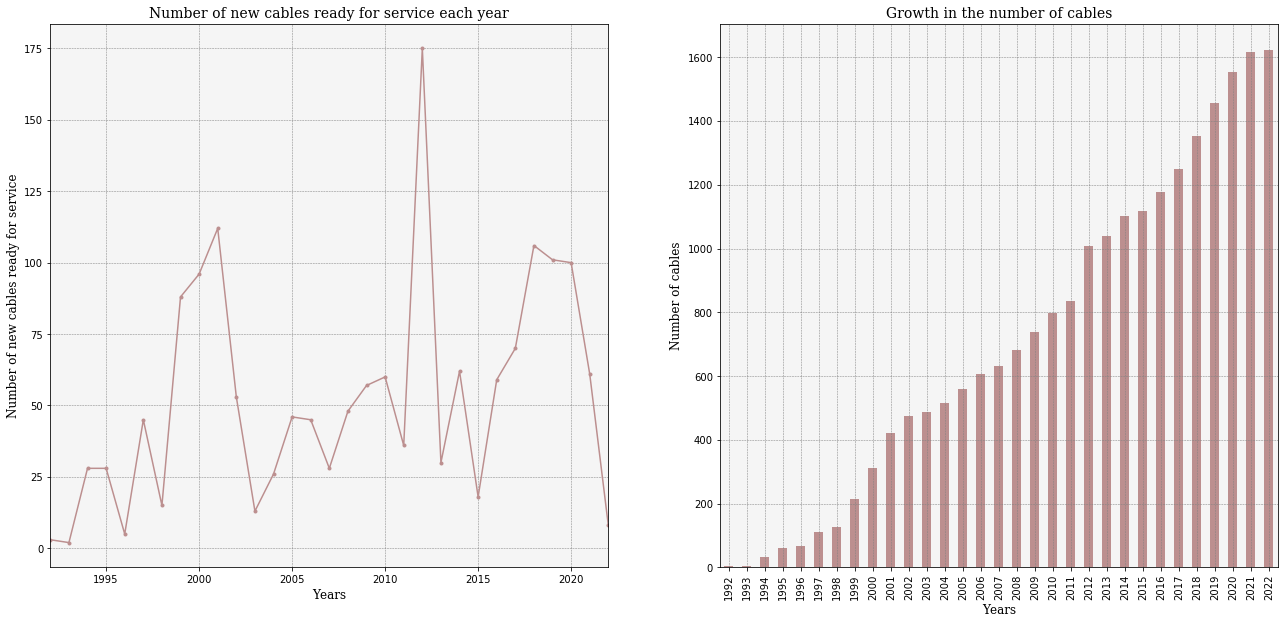

In [13]:
fig, ax = plt.subplots(figsize=(22,10), ncols=2)
ax0, ax1 = ax
final_df.groupby('RFS').size().plot(ax=ax0, color='rosybrown', marker='.')
ax0.grid(linestyle='--', linewidth='0.5', color='grey')
ax0.set_facecolor('whitesmoke')
ax0.set_ylabel('Number of new cables ready for service', size=12, fontname='DejaVu Serif')
ax0.set_xlabel('Years', size=12, fontname='DejaVu Serif')
ax0.set_title('Number of new cables ready for service each year', size=14, fontname='DejaVu Serif')

final_df.groupby('RFS').size().cumsum().plot(ax=ax1, color='rosybrown', kind='bar')
ax1.grid(linestyle='--', linewidth='0.5', color='grey')
ax1.set_facecolor('whitesmoke')
ax1.set_xticklabels(np.arange(1992, 2023, 1))
ax1.set_ylabel('Number of cables', size=12, fontname='DejaVu Serif')
ax1.set_xlabel('Years', size=12, fontname='DejaVu Serif')
ax1.set_title('Growth in the number of cables', size=14, fontname='DejaVu Serif')

fig.savefig('Number of new cables ready for service each year.png')

Source: https://github.com/telegeography/www.submarinecablemap.com

In [14]:
final_df = final_df.rename(columns={'geometry':'path'})
geo_final_df = gpd.GeoDataFrame(final_df, geometry='path')
geo_final_df.set_geometry('path')

name     length  \
cable_id                                                          
1571               ACS Alaska-Oregon Network (AKORN)   3,000 km   
1571               ACS Alaska-Oregon Network (AKORN)   3,000 km   
1571               ACS Alaska-Oregon Network (AKORN)   3,000 km   
1571               ACS Alaska-Oregon Network (AKORN)   3,000 km   
1307                                   Aden-Djibouti     269 km   
1307                                   Aden-Djibouti     269 km   
1317                                         Adria-1     440 km   
1317                                         Adria-1     440 km   
1317                                         Adria-1     440 km   
1691                                     AEConnect-1   5,536 km   
1691                                     AEConnect-1   5,536 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
1629                    Africa Coast to Europe (ACE)  17,000 km   
...                                              ...        ...   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1094                               Venezuela Festoon   1,200 km   
1249      Vodafone Malta-Sicily Cable System (VMSCS)     260 km   
1249      Vodafone Malta-Sicily Cable System (VMSCS)     260 km   
1926                                         WALL-LI      60 km   
1926                                         WALL-LI      60 km   
1517                            WARF Submarine Cable     680 km   
1517                            WARF Submarine Cable     680 km   
1517                            WARF Submarine Cable     680 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West African Cable System (WACS)  14,530 km   
1560                West Afr

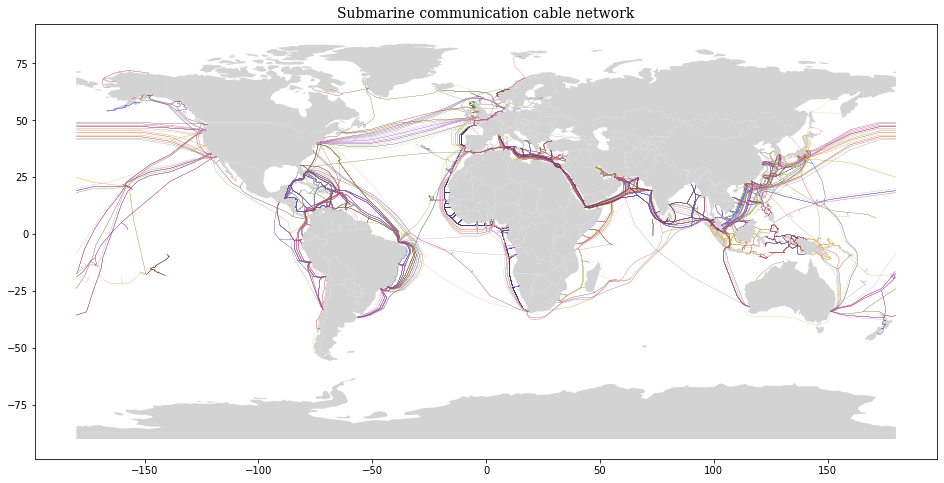

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18,8))
world.plot(ax=ax, color='lightgray', edgecolor='')
geo_final_df.plot(ax=ax, cmap='tab20b', linewidth=0.1)
#ax.axis('off')
ax.set_title('Submarine communication cable network', fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})
fig.savefig('Submarine communication cable network.png')

Source: https://github.com/telegeography/www.submarinecablemap.com

## Step 2: the fishing effort dataset

In [16]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy
import cartopy.crs as ccrs
fish = pd.read_csv('2016-12-31.csv')
fish.head()

date  lat_bin  lon_bin flag      geartype  vessel_hours  \
0  2016-12-31    -1261     1320  AGO  purse_seines      9.692361   
1  2016-12-31     -991     1275  AGO      trawlers      0.191389   
2  2016-12-31     -990     1274  AGO      trawlers      0.233611   
3  2016-12-31     -985     1272  AGO      trawlers      0.310000   
4  2016-12-31     -982     1271  AGO      trawlers      0.235972   

   fishing_hours  mmsi_present  
0            0.0             1  
1            0.0             1  
2            0.0             1  
3            0.0             1  
4            0.0             1

In [17]:
fish.lon_bin = fish.lon_bin/100
fish.lat_bin = fish.lat_bin/100
fish = fish.rename(columns={'lon_bin':'longitude', 'lat_bin':'latitude'})

In [18]:
geofish = gpd.GeoDataFrame(fish, geometry=gpd.points_from_xy(fish.longitude, fish.latitude), crs=ccrs.PlateCarree)
geofish.head()

date  latitude  longitude flag      geartype  vessel_hours  \
0  2016-12-31    -12.61      13.20  AGO  purse_seines      9.692361   
1  2016-12-31     -9.91      12.75  AGO      trawlers      0.191389   
2  2016-12-31     -9.90      12.74  AGO      trawlers      0.233611   
3  2016-12-31     -9.85      12.72  AGO      trawlers      0.310000   
4  2016-12-31     -9.82      12.71  AGO      trawlers      0.235972   

   fishing_hours  mmsi_present             geometry  
0            0.0             1  POINT (13.2 -12.61)  
1            0.0             1  POINT (12.75 -9.91)  
2            0.0             1   POINT (12.74 -9.9)  
3            0.0             1  POINT (12.72 -9.85)  
4            0.0             1  POINT (12.71 -9.82)

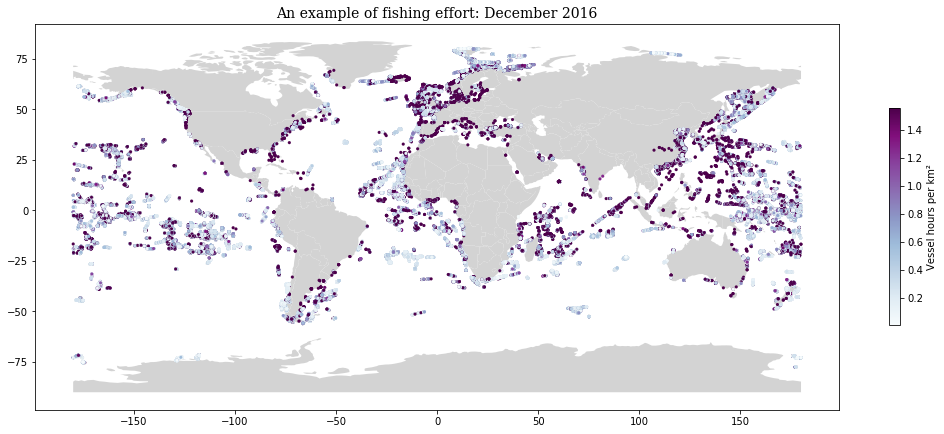

In [19]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(18,8))

ax.set_aspect('equal')

world.plot(ax=ax, color='lightgray', edgecolor='')

stationmin = fish['vessel_hours'].min()  
stationmean = fish['vessel_hours'].mean()
splot = geofish.plot(ax=ax, column = 'vessel_hours', cmap='BuPu', marker = '.', 
                     vmin = stationmin, vmax = stationmean, linewidth=0.1, 
                     legend=False)

scatter = splot.collections[1]
plt.colorbar(scatter, ax=ax, shrink = 0.5, label = 'Vessel hours per km²' )

ax.set_title('An example of fishing effort: December 2016', fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

fig.savefig('Fishing.png')

Source: https://github.com/GlobalFishingWatch/paper-global-footprint-of-fisheries

## Step 3: the submarine volcano dataset

In [20]:
import chardet
import pandas as pd

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc


my_encoding = find_encoding('volcanoes_bis.csv')
vol = pd.read_csv('volcanoes_bis.csv', encoding=my_encoding)
vol.head()

Volcano Name        Country         Region  Latitude  Longitude    Elev  \
0              Abu          Japan   Honshu-Japan     34.50     131.60   571.0   
1       Acamarachi          Chile        Chile-N    -23.30     -67.62  6046.0   
2       Acatenango      Guatemala      Guatemala     14.50     -90.88  3976.0   
3  Acigol-Nevsehir         Turkey         Turkey     38.57      34.52  1689.0   
4            Adams  United States  US-Washington     46.21    -121.49  3742.0   

             Type            Status  
0  Shield volcano          Holocene  
1   Stratovolcano          Holocene  
2   Stratovolcano        Historical  
3            Maar          Holocene  
4   Stratovolcano  Tephrochronology

In [21]:
geovol = gpd.GeoDataFrame(vol, geometry=gpd.points_from_xy(vol.Longitude, vol.Latitude), crs={'init': 'epsg:4326'})
geovol.head()

Volcano Name        Country         Region  Latitude  Longitude    Elev  \
0              Abu          Japan   Honshu-Japan     34.50     131.60   571.0   
1       Acamarachi          Chile        Chile-N    -23.30     -67.62  6046.0   
2       Acatenango      Guatemala      Guatemala     14.50     -90.88  3976.0   
3  Acigol-Nevsehir         Turkey         Turkey     38.57      34.52  1689.0   
4            Adams  United States  US-Washington     46.21    -121.49  3742.0   

             Type            Status               geometry  
0  Shield volcano          Holocene     POINT (131.6 34.5)  
1   Stratovolcano          Holocene   POINT (-67.62 -23.3)  
2   Stratovolcano        Historical    POINT (-90.88 14.5)  
3            Maar          Holocene    POINT (34.52 38.57)  
4   Stratovolcano  Tephrochronology  POINT (-121.49 46.21)

In [22]:
gb = geovol.groupby(geovol.Type)

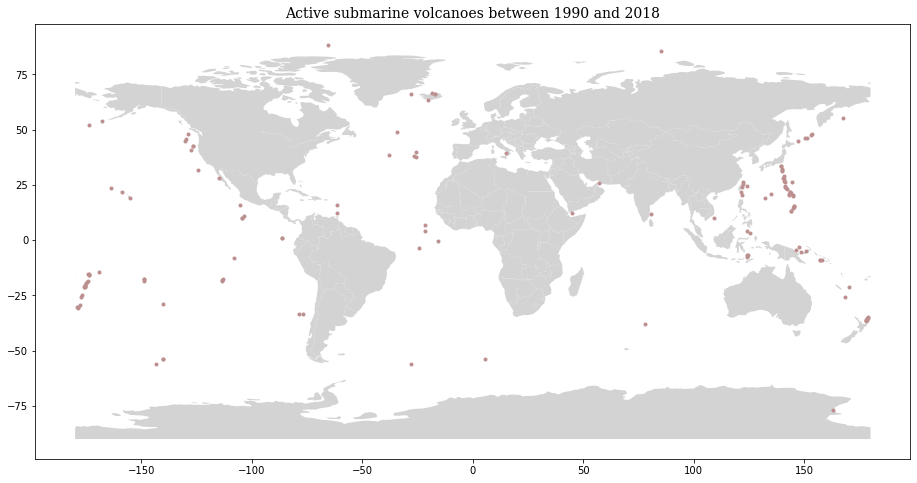

In [23]:
subvol = gb.get_group('Submarine volcano')

fig, ax = plt.subplots(figsize=(18,8))

ax.set_aspect('equal')

world.plot(ax=ax, color='lightgray', edgecolor='')
subvol.plot(ax=ax, marker = '.', color='rosybrown')

ax.set_title('Active submarine volcanoes between 1990 and 2018', fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})
fig.savefig('Submarine_volcanoes.png')

Source: https://www.ngdc.noaa.gov

## Step 4: the earthquake dataset

In [24]:
import chardet
import pandas as pd

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    charenc = result['encoding']
    return charenc


my_encoding = find_encoding('earthquakes1990_2018.csv')
eq = pd.read_csv('earthquakes1990_2018.csv', encoding=my_encoding)
eq.Magnitude = pd.to_numeric(eq.Magnitude, errors='coerce')
eq.head()

DateTime  Latitude  Longitude  Depth  Magnitude MagType  \
0  1990/01/04 05:32:21.04   -15.397   -172.850   53.5        6.4      Ms   
1  1990/01/09 18:51:29.21    24.753     95.241  119.2        6.1      Mb   
2  1990/01/14 03:03:19.23    37.819     91.971   12.2        6.1      Mb   
3  1990/01/14 21:04:03.26   -29.709   -177.467   58.3        6.0      Ms   
4  1990/01/18 12:45:23.60   -30.141   -177.688   13.4        6.0      Mb   

   NbStations  Gap  Distance   RMS Source       EventID  
0       411.0  NaN       NaN  1.18    NEI  1.990010e+09  
1       442.0  NaN       NaN  1.09    NEI  1.990011e+09  
2       437.0  NaN       NaN  1.08    NEI  1.990011e+09  
3       208.0  NaN       NaN  1.26    NEI  1.990011e+09  
4       262.0  NaN       NaN  1.15    NEI  1.990012e+09

In [25]:
geoeq = gpd.GeoDataFrame(eq, geometry=gpd.points_from_xy(eq.Longitude, eq.Latitude), crs={'init': 'epsg:4326'})
geoeq.head()

DateTime  Latitude  Longitude  Depth  Magnitude MagType  \
0  1990/01/04 05:32:21.04   -15.397   -172.850   53.5        6.4      Ms   
1  1990/01/09 18:51:29.21    24.753     95.241  119.2        6.1      Mb   
2  1990/01/14 03:03:19.23    37.819     91.971   12.2        6.1      Mb   
3  1990/01/14 21:04:03.26   -29.709   -177.467   58.3        6.0      Ms   
4  1990/01/18 12:45:23.60   -30.141   -177.688   13.4        6.0      Mb   

   NbStations  Gap  Distance   RMS Source       EventID  \
0       411.0  NaN       NaN  1.18    NEI  1.990010e+09   
1       442.0  NaN       NaN  1.09    NEI  1.990011e+09   
2       437.0  NaN       NaN  1.08    NEI  1.990011e+09   
3       208.0  NaN       NaN  1.26    NEI  1.990011e+09   
4       262.0  NaN       NaN  1.15    NEI  1.990012e+09   

                                      geometry  
0            POINT (-172.849999999999 -15.397)  
1                        POINT (95.241 24.753)  
2                        POINT (91.971 37.819)  
3                     POINT (-177.467 -29.709)  
4  POINT (-177.687999999999 -30.1409999999999)

In [26]:
magmin = geoeq.Magnitude.min()
magmax= geoeq.Magnitude.max()

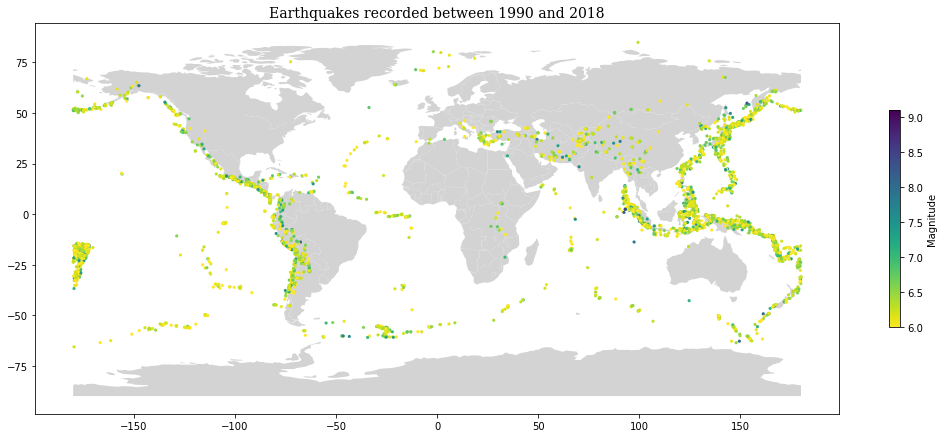

In [27]:
fig, ax = plt.subplots(figsize=(18,8))

ax.set_aspect('equal')

world.plot(ax=ax, color='lightgray', edgecolor='')

splot = geoeq.plot(ax=ax, column = 'Magnitude', cmap='viridis_r', marker = '.', linewidth=0.1, 
                     vmin = magmin, vmax = magmax, legend=False)

scatter = splot.collections[1]
plt.colorbar(scatter, ax=ax, shrink = 0.5, label = 'Magnitude')

ax.set_title('Earthquakes recorded between 1990 and 2018', fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})
fig.savefig('Earthquakes_1990-2018.png')

Source: https://data.humdata.org/dataset/catalog-of-earthquakes1970-2014

## Step 5: risk maps (juxtaposition of critical infrastructure and hazards)

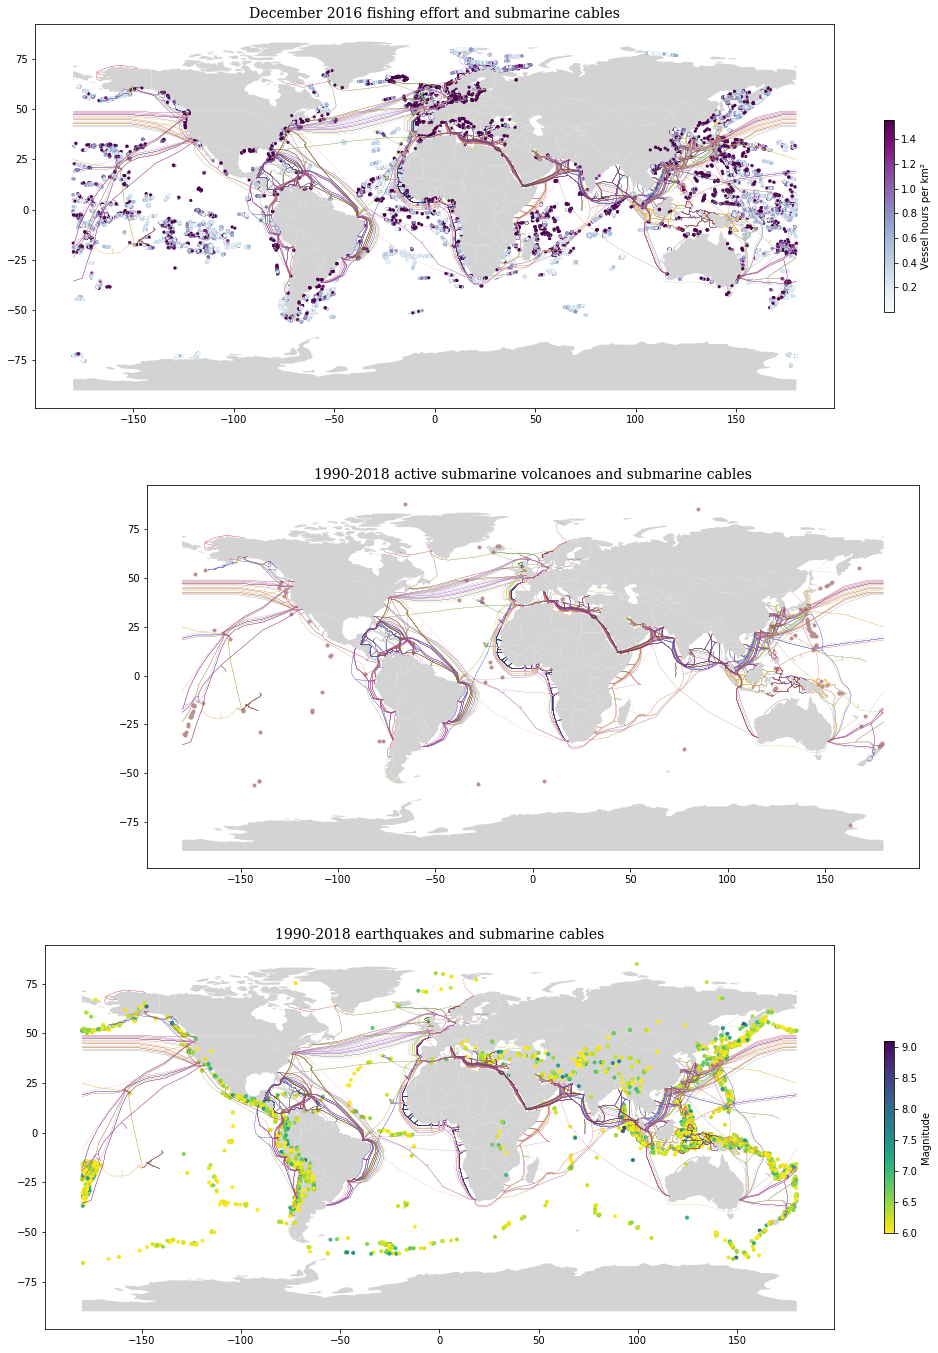

In [28]:
fig, ax = plt.subplots(figsize=(18, 24), nrows=3)

world.plot(ax=ax[0], color='lightgray', edgecolor='')
geo_final_df.plot(ax=ax[0], cmap='tab20b', linewidth=0.1)
fishplot = geofish.plot(ax=ax[0], column = 'vessel_hours', cmap='BuPu', marker = '.', 
                     vmin = stationmin, vmax = stationmean, linewidth=0.1, 
                     legend=False)
scatter = fishplot.collections[2]
plt.colorbar(scatter, ax=ax[0], shrink = 0.5, label = 'Vessel hours per km²' )
ax[0].set_title('December 2016 fishing effort and submarine cables', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

world.plot(ax=ax[1], color='lightgray', edgecolor='')
geo_final_df.plot(ax=ax[1], cmap='tab20b', linewidth=0.1)
subvol.plot(ax=ax[1], marker = '.', color='rosybrown')
ax[1].set_title('1990-2018 active submarine volcanoes and submarine cables', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

world.plot(ax=ax[2], color='lightgray', edgecolor='')
geo_final_df.plot(ax=ax[2], cmap='tab20b', linewidth=0.1)
splot = geoeq.plot(ax=ax[2], column = 'Magnitude', cmap='viridis_r', marker = '.', vmin = magmin, vmax = magmax, legend=False)
scatter2 = splot.collections[2]
plt.colorbar(scatter2, ax=ax[2], shrink = 0.5, label = 'Magnitude' )
ax[2].set_title('1990-2018 earthquakes and submarine cables', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

fig.savefig('Risk_maps.png')

## Step 6: which cables are the least exposed to a particular risk? and in general?

**Intersection with fishing areas**

In [29]:
polyfish = geofish.geometry.buffer(1)
geopolyfish = gpd.GeoDataFrame(geometry=polyfish, crs={'init': 'epsg:4326'})
geopolyfish.head()

geometry
0  POLYGON ((14.2 -12.61, 14.1951847266722 -12.70...
1  POLYGON ((13.75 -9.91, 13.7451847266722 -10.00...
2  POLYGON ((13.74 -9.9, 13.7351847266722 -9.9980...
3  POLYGON ((13.72 -9.85, 13.7151847266722 -9.948...
4  POLYGON ((13.71 -9.82, 13.7051847266722 -9.918...

In [30]:
geopolyfish.geometry.unary_union

In [31]:
geo_final_df['intersection1'] = geo_final_df.intersects(geopolyfish.geometry.unary_union)
gbfish = geo_final_df.groupby(geo_final_df.intersection1)
inter_fish = gbfish.get_group(False)
inter_fish

name    length  \
cable_id                                                                
1307                                          Aden-Djibouti    269 km   
1307                                          Aden-Djibouti    269 km   
1529                                                 ALBA-1  1,860 km   
1529                                                 ALBA-1  1,860 km   
1529                                                 ALBA-1  1,860 km   
1529                                                 ALBA-1  1,860 km   
1319                                                 Aletar    787 km   
1319                                                 Aletar    787 km   
1289                                        Alonso de Ojeda    128 km   
1289                                        Alonso de Ojeda    128 km   
1494                                       Amerigo Vespucci     85 km   
1494                                       Amerigo Vespucci     85 km   
1872                                                 Avassa    260 km   
1872                                                 Avassa    260 km   
1872                                                 Avassa    260 km   
1872                                                 Avassa    260 km   
1356                              Bharat Lanka Cable System    325 km   
1356                              Bharat Lanka Cable System    325 km   
1781                 Boracay-Palawan Submarine Cable System    332 km   
1781                 Boracay-Palawan Submarine Cable System    332 km   
1781                 Boracay-Palawan Submarine Cable System    332 km   
1068                            Cayman-Jamaica Fiber System    870 km   
1068                            Cayman-Jamaica Fiber System    870 km   
1068                            Cayman-Jamaica Fiber System    870 km   
1861                Chennai-Andaman & Nicobar Islands Cable  2,300 km   
1861                Chennai-Andaman & Nicobar Islands Cable  2,300 km   
1861                Chennai-Andaman & Nicobar Islands Cable  2,300 km   
1861                Chennai-Andaman & Nicobar Islands Cable  2,300 km   
1861                Chennai-Andaman & Nicobar Islands Cable  2,300 km   
1861                Chennai-Andaman & Nicobar Islands Cable  2,300 km   
...                                                     ...       ...   
1247                           Saudi Arabia-Sudan-1 (SAS-1)    333 km   
1675                           Saudi Arabia-Sudan-2 (SAS-2)    330 km   
1675                           Saudi Arabia-Sudan-2 (SAS-2)    330 km   
1665                                               Silphium    425 km   
1665                                               Silphium    425 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
1885                                         SMPCS Packet-2  3,498 km   
2001      Sorsogon-Samar Submarine Fiber Optical Interco...     21 km   
2001      Sorsogon-Samar Submarine Fiber Optical Interco...     21 km   
1893             Strategic Evolution Underwater Link (SEUL)     24 km   
1893             Strategic Evolution Underwater Link (SEUL)     24 km   
1881                    Sumatera Bangka Cable System (SBCS)     57 km   
1881                    Sumatera Bangka Cable System (SBCS)     57 km   
1806                                    

**Intersection with volcanic areas**

In [32]:
polyvol = subvol.geometry.buffer(6)
geopolyvol = gpd.GeoDataFrame(geometry=polyvol, crs={'init': 'epsg:4326'})
geopolyvol.head()

geometry
14   POLYGON ((151.03 20.42, 151.0011083600332 19.8...
101  POLYGON ((-124 45.95, -124.0288916399668 45.36...
125  POLYGON ((131.49 3.14, 131.4611083600332 2.551...
137  POLYGON ((145.92 31.92, 145.8911083600332 31.3...
168  POLYGON ((-162.03 53.93, -162.0588916399668 53...

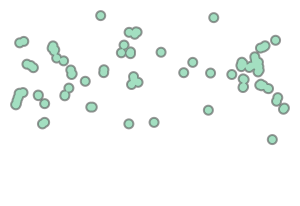

In [33]:
geopolyvol.geometry.unary_union

In [34]:
geo_final_df['intersection2'] = geo_final_df.intersects(geopolyvol.geometry.unary_union)
gbvol = geo_final_df.groupby(geo_final_df.intersection2)
inter_vol = gbvol.get_group(False)
inter_vol

name     length  \
cable_id                                            
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
...                                ...        ...   
2067                        TRANSCAN-2     238 km   
2067                        TRANSCAN-2     238 km   
2067                        TRANSCAN-2     238 km   
2067                        TRANSCAN-2     238 km   
1449                        TRANSCAN-3     210 km   
1449                        TRANSCAN-3     210 km   
1341                         Turcyos-1     110 km   
1341                         Turcyos-1     110 km   
1705                         Turcyos-2     213 km   
1705                         Turcyos-2     213 km   
1981                       Tverrlinken       n.a.   
1981                       Tverrlinken       n.a.   
1981                       Tverrlinken       n.a.   
1981                       Tverrlinken       n.a.   
1306                            UGARIT     239 km   
1306                            UGARIT     239 km   
1703              UK-Channel Islands-7     124 km   
1703              UK-Channel Islands-7     124 km   
1704              UK-Channel Islands-8     237 km   
1704              UK-Channel Islands-8     237 km   
1365                 UK-Netherlands 14     208 km   
1365                 UK-Netherlands 14     208 km   
1998                       Ultramar GE     263 km   
1998                       Ultramar GE     263 km   
1936                         Ulysses 2       n.a.   
1936                         Ulysses 2       n.a.   
1132                            Unisur     265 km   
1132                            Unisur     265 km   
1926                           WALL-LI      60 km   
1926                           WALL-LI      60 km   

                                                     owners  \
cable_id                                                      
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1

**Intersection with seismic areas**

In [35]:
polyeq = geoeq.geometry.buffer(4)
geopolyeq = gpd.GeoDataFrame(geometry=polyeq, crs={'init': 'epsg:4326'})
geopolyeq.head()

geometry
0  POLYGON ((-168.849999999999 -15.397, -168.8692...
1  POLYGON ((99.241 24.753, 99.22173890668878 24....
2  POLYGON ((95.971 37.819, 95.95173890668879 37....
3  POLYGON ((-173.467 -29.709, -173.4862610933112...
4  POLYGON ((-173.687999999999 -30.1409999999999,...

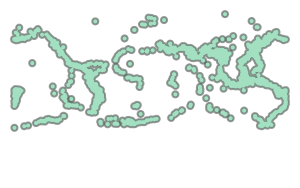

In [36]:
geopolyeq.geometry.unary_union

In [37]:
geo_final_df['intersection3'] = geo_final_df.intersects(geopolyeq.geometry.unary_union)
gbeq = geo_final_df.groupby(geo_final_df.intersection3)
inter_eq = gbeq.get_group(False)
inter_eq

name     length  \
cable_id                                            
1307                     Aden-Djibouti     269 km   
1307                     Aden-Djibouti     269 km   
1691                       AEConnect-1   5,536 km   
1691                       AEConnect-1   5,536 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
1629      Africa Coast to Europe (ACE)  17,000 km   
...                                ...        ...   
2069                 Tenerife-La Palma       n.a.   
2067                        TRANSCAN-2     238 km   
2067                        TRANSCAN-2     238 km   
2067                        TRANSCAN-2     238 km   
2067                        TRANSCAN-2     238 km   
1449                        TRANSCAN-3     210 km   
1449                        TRANSCAN-3     210 km   
1981                       Tverrlinken       n.a.   
1981                       Tverrlinken       n.a.   
1981                       Tverrlinken       n.a.   
1981                       Tverrlinken       n.a.   
1703              UK-Channel Islands-7     124 km   
1703              UK-Channel Islands-7     124 km   
1704              UK-Channel Islands-8     237 km   
1704              UK-Channel Islands-8     237 km   
1365                 UK-Netherlands 14     208 km   
1365                 UK-Netherlands 14     208 km   
1998                       Ultramar GE     263 km   
1998                       Ultramar GE     263 km   
1936                         Ulysses 2       n.a.   
1936                         Ulysses 2       n.a.   
1132                            Unisur     265 km   
1132                            Unisur     265 km   
1926                           WALL-LI      60 km   
1926                           WALL-LI      60 km   
1517              WARF Submarine Cable     680 km   
1517              WARF Submarine Cable     680 km   
1517              WARF Submarine Cable     680 km   
1081                            Yellow   7,001 km   
1081                            Yellow   7,001 km   

                                                     owners  \
cable_id                                                      
1307      Djibouti Telecom,  TeleYemen,  Tata Communicat...   
1307      Djibouti Telecom,  TeleYemen,  Tata Communicat...   
1691                                             Aqua Comms   
1691                                             Aqua Comms   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1629      Orange,  Dolphin Telecom,  Cote d’Ivoire Telec...   
1

**To which of these three risks is the cable network most exposed?**

Text(0.5, 1, 'Submarine cables that are least likely to be exposed to risk "earthquake"')

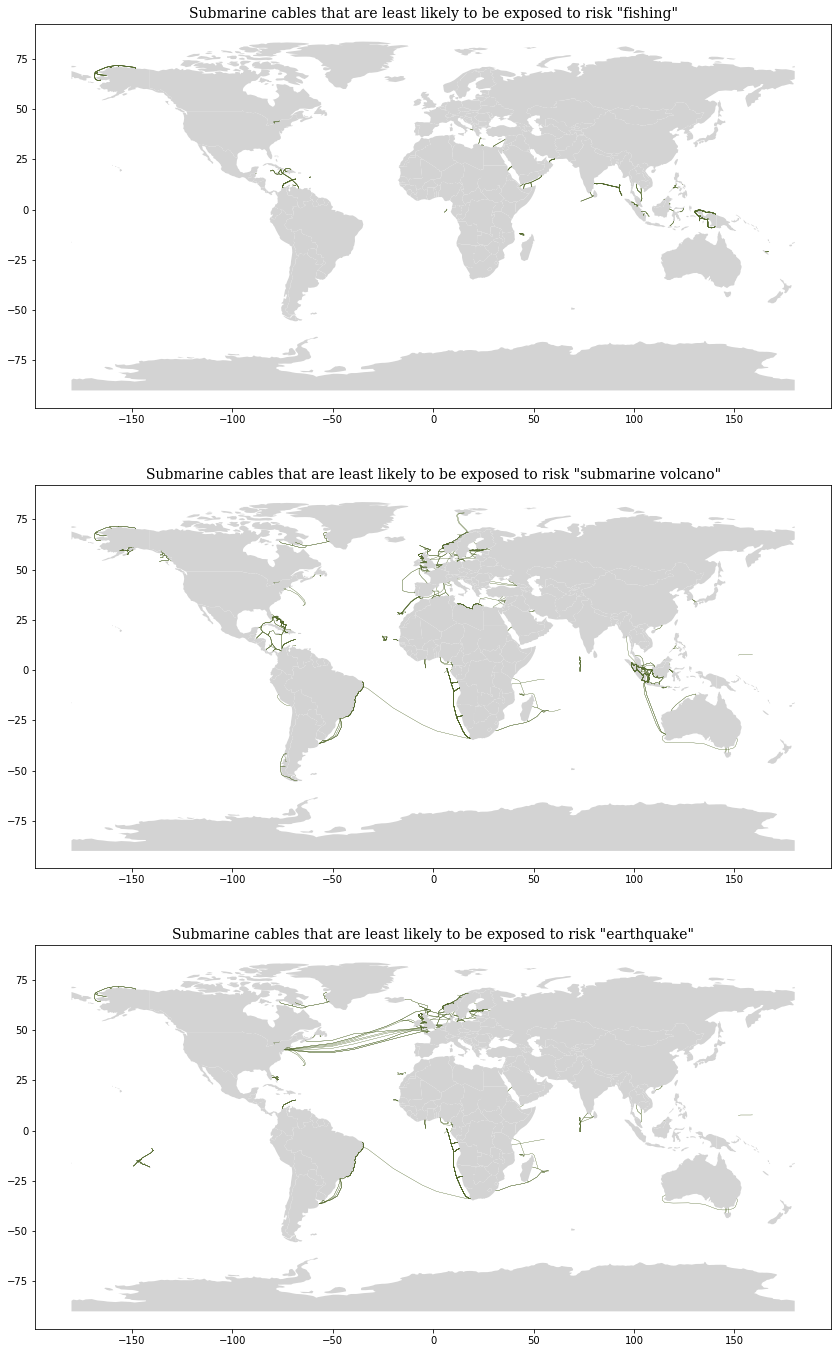

In [38]:
fig, ax = plt.subplots(figsize=(18, 24), nrows=3)

world.plot(ax=ax[0], color='lightgray', edgecolor='')
inter_fish.plot(ax=ax[0], color = 'darkolivegreen', linewidth=0.5)
ax[0].set_title('Submarine cables that are least likely to be exposed to risk "fishing"', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

world.plot(ax=ax[1], color='lightgray', edgecolor='')
inter_vol.plot(ax=ax[1], color = 'darkolivegreen',linewidth=0.2)
ax[1].set_title('Submarine cables that are least likely to be exposed to risk "submarine volcano"', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

world.plot(ax=ax[2], color='lightgray', edgecolor='')
inter_eq.plot(ax=ax[2], color = 'darkolivegreen', linewidth=0.2)
ax[2].set_title('Submarine cables that are least likely to be exposed to risk "earthquake"', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

**What do we have left?**

In [39]:
geo_final_df.head()

name    length  \
cable_id                                                
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1571      ACS Alaska-Oregon Network (AKORN)  3,000 km   
1307                          Aden-Djibouti    269 km   

                                                     owners  \
cable_id                                                      
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1571                                  Alaska Communications   
1307      Djibouti Telecom,  TeleYemen,  Tata Communicat...   

                                                       path     RFS  \
cable_id                                                              
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0   
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0   
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0   
1571      (LINESTRING (-151.291670394858 60.689928950949...  2009.0   
1307      (LINESTRING (43.1479928876509 11.5948813293645...     NaN   

          intersection1  intersection2  intersection3  
cable_id                                               
1571               True           True           True  
1571               True           True           True  
1571               True           True           True  
1571               True           True           True  
1307              False           True          False

In [40]:
winners = geo_final_df[(geo_final_df['intersection1'] == False) & 
                       (geo_final_df['intersection2'] == False) &
                      (geo_final_df['intersection3'] == False)]
winners.head()

name  length                  owners  \
cable_id                                                                  
1872                             Avassa  260 km  Comoros Telecom,  STOI   
1872                             Avassa  260 km  Comoros Telecom,  STOI   
1872                             Avassa  260 km  Comoros Telecom,  STOI   
1872                             Avassa  260 km  Comoros Telecom,  STOI   
1803      Comoros Domestic Cable System    n.a.         Comores Telecom   

                                                       path     RFS  \
cable_id                                                              
1872      (LINESTRING (43.4892035834341 -11.923115980293...  2016.0   
1872      (LINESTRING (43.4892035834341 -11.923115980293...  2016.0   
1872      (LINESTRING (43.4892035834341 -11.923115980293...  2016.0   
1872      (LINESTRING (43.4892035834341 -11.923115980293...  2016.0   
1803      (LINESTRING (43.4892035834341 -11.923115980293...     NaN   

          intersection1  intersection2  intersection3  
cable_id                                               
1872              False          False          False  
1872              False          False          False  
1872              False          False          False  
1872              False          False          False  
1803              False          False          False

In [41]:
len(winners)

43

In [42]:
geowinners = gpd.GeoDataFrame(winners, geometry=winners.path)

Text(0.5, 1, 'And the winners are...')

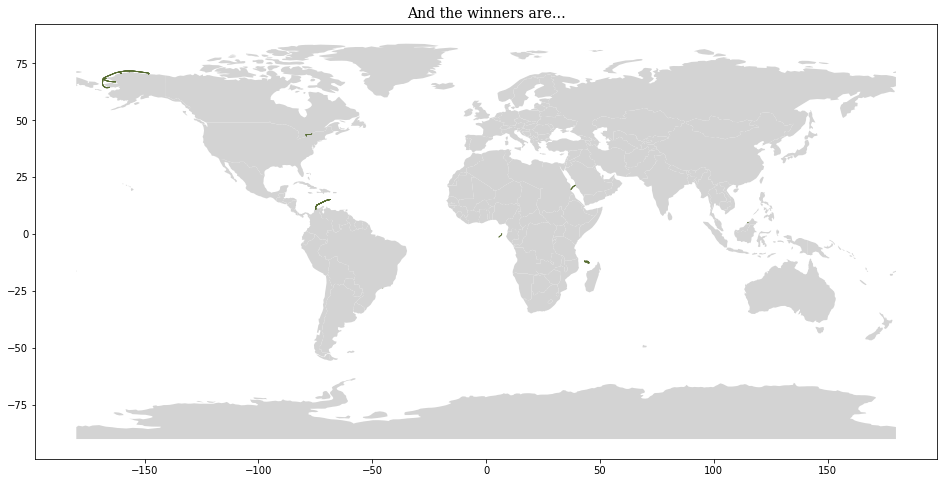

In [43]:
fig, ax = plt.subplots(figsize=(18, 8))

world.plot(ax=ax, color='lightgray', edgecolor='')
geowinners.plot(ax=ax, color = 'darkolivegreen', linewidth=0.8)
ax.set_title('And the winners are...', 
                fontdict={'fontsize': '14', 'fontweight' : '5', 'fontname':'DejaVu Serif'})

## Conclusion

Once again, human activities are the main source of risk to human activities. Indeed, a fishing day (31/12/2016) may possibly threaten 93% of the cable sections. This is much more than the sections threatened by natural hazards such as submarine volcanoes (60%) and earthquakes (73%).